In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_fscore_support, roc_curve, auc, precision_score,recall_score, f1_score

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST dataset
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
missing_train = np.isnan(X_train).sum()
print("Missing values in the train data:")
print(missing_train)
missing_test = np.isnan(X_test).sum()
print("\nMissing values in the test data:")
print(missing_test)

Missing values in the train data:
0

Missing values in the test data:
0


In [21]:
num_unique_classes = np.unique(y_train).shape[0]
print("Number of unique classes:", num_unique_classes)

Number of unique classes: 10


In [23]:
unique, counts = np.unique(y_train, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


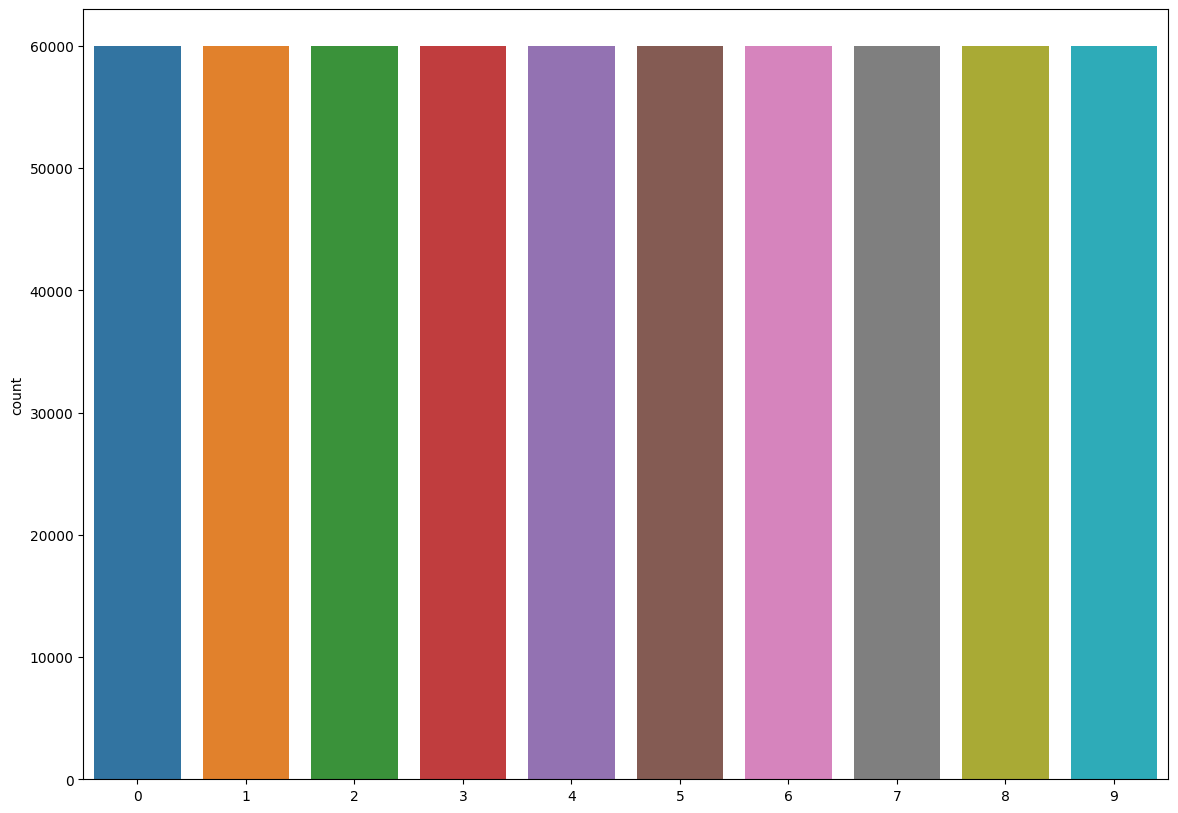

In [71]:
plt.figure(figsize=(14, 10))
sns.countplot(data=y_train)
plt.show()

In [25]:
# Flatten the images and normalize pixel values
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [28]:
X_train.shape

(60000, 784)

In [29]:
X_test.shape

(10000, 784)

In [30]:
y_train.shape

(60000, 10)

In [31]:
y_test.shape

(10000, 10)

In [32]:
X_test.shape

(10000, 784)

In [33]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
y_train.shape

(60000, 10)

In [ ]:
X_test.shape

(10000, 784)

In [73]:
class ANN:
  def __init__(self):

    self.learning_rate = 0.01
    self.epochs = 10

    # Neural network architecture parameters
    self.input_size = 784  # 28*28
    self.hidden_size = 64
    self.output_size = 10  # 10 classes for MNIST digits

    # Initialize weights and biases
    np.random.seed(42)
    self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
    self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
    self.bias_hidden = np.zeros((1, self.hidden_size))
    self.bias_output = np.zeros((1, self.output_size))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self,x):
      return x * (1 - x)

  def train(self,x_train,y_train):
      # Training the network
      X_train = x_train
      y_train = y_train
      for e in range(self.epochs):
          for i in range(len(X_train)):
              # Forward pass
              input_layer = np.array([X_train[i]])
              hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
              output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)

              # Backpropagation
              output_error = y_train[i] - output_layer
              output_delta = output_error * self.sigmoid_derivative(output_layer)

              hidden_error = output_delta.dot(self.weights_hidden_output.T)
              hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer)

              # Update weights and biases
              self.weights_hidden_output += hidden_layer.T.dot(output_delta) * self.learning_rate
              self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
              self.weights_input_hidden += input_layer.T.dot(hidden_delta) * self.learning_rate
              self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

          # Output epoch results
          print(f"Epoch {e+1}/{self.epochs}")

  def evaluate(self,X_test,y_test):
      # Evaluating the model
      correct_predictions = 0
      pred = []
      for i in range(len(X_test)):
          input_layer = np.array([X_test[i]])
          hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
          output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)
          pred.append(output_layer)
          if np.argmax(output_layer) == np.argmax(y_test[i]):
              correct_predictions += 1

      print(f"Test accuracy: {correct_predictions / len(y_test)}")
      return pred

In [75]:
ann_model = ANN()

In [76]:
ann_model.train(X_train,y_train)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [58]:
pred = ann_model.evaluate(X_test,y_test)

Test accuracy: 0.8631


In [59]:
pred = np.array(pred).squeeze()

In [60]:
top1_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print(f"Top-1 Accuracy: {top1_accuracy * 100:.2f}%")

top5_predictions = np.argsort(pred, axis=1)[:, -5:]
top5_accuracy = np.mean(np.any(top5_predictions == np.argmax(y_test, axis=1)[:, None], axis=1))
print(f"Top-5 Accuracy: {top5_accuracy * 100:.2f}%")

Top-1 Accuracy: 86.31%
Top-5 Accuracy: 91.89%


In [61]:
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.8818
Recall: 0.8631
F1-Score: 0.8205


In [62]:
# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[   2    3  270  130   13  225  112   98   77   50]
 [   0 1117    5    1    1    1    2    1    7    0]
 [   0    0  994   10    5    1    4   10    8    0]
 [   0    0   14  955    0   11    4   11   10    5]
 [   0    0    4    0  947    1    8    2    2   18]
 [   0    2    1   14    2  845   11    4    8    5]
 [   0    3    5    1    4   15  924    2    4    0]
 [   0    5   20    8    2    1    0  975    4   13]
 [   0    3    5    9    7    6   11    5  922    6]
 [   0    3    0   11   18    7    1    9   10  950]]


In [63]:
num_classes = 10
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

for cls in range(num_classes):
    TP[cls] = conf_matrix[cls, cls]
    TN[cls] = np.sum(conf_matrix) - np.sum(conf_matrix[cls, :]) - np.sum(conf_matrix[:, cls]) + conf_matrix[cls, cls]
    FP[cls] = np.sum(conf_matrix[:, cls]) - conf_matrix[cls, cls]
    FN[cls] = np.sum(conf_matrix[cls, :]) - conf_matrix[cls, cls]

for cls in range(num_classes):
    print(f"Class {cls}:")
    print(f"  True Positives (TP): {TP[cls]}")
    print(f"  True Negatives (TN): {TN[cls]}")
    print(f"  False Positives (FP): {FP[cls]}")
    print(f"  False Negatives (FN): {FN[cls]}\n")


Class 0:
  True Positives (TP): 2.0
  True Negatives (TN): 9020.0
  False Positives (FP): 0.0
  False Negatives (FN): 978.0

Class 1:
  True Positives (TP): 1117.0
  True Negatives (TN): 8846.0
  False Positives (FP): 19.0
  False Negatives (FN): 18.0

Class 2:
  True Positives (TP): 994.0
  True Negatives (TN): 8644.0
  False Positives (FP): 324.0
  False Negatives (FN): 38.0

Class 3:
  True Positives (TP): 955.0
  True Negatives (TN): 8806.0
  False Positives (FP): 184.0
  False Negatives (FN): 55.0

Class 4:
  True Positives (TP): 947.0
  True Negatives (TN): 8966.0
  False Positives (FP): 52.0
  False Negatives (FN): 35.0

Class 5:
  True Positives (TP): 845.0
  True Negatives (TN): 8840.0
  False Positives (FP): 268.0
  False Negatives (FN): 47.0

Class 6:
  True Positives (TP): 924.0
  True Negatives (TN): 8889.0
  False Positives (FP): 153.0
  False Negatives (FN): 34.0

Class 7:
  True Positives (TP): 975.0
  True Negatives (TN): 8830.0
  False Positives (FP): 142.0
  False Ne

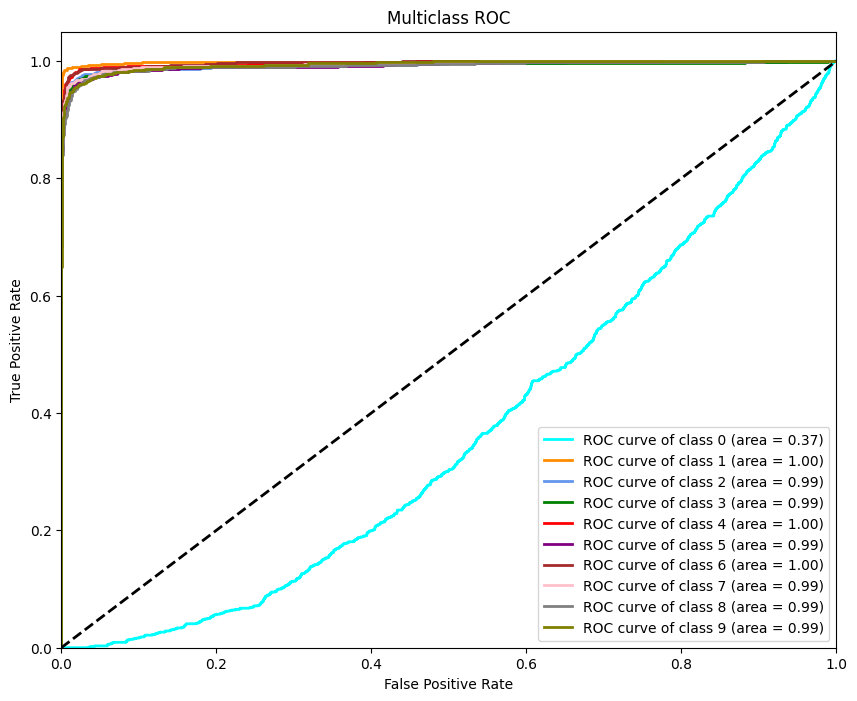

In [64]:
from itertools import cycle

n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()